In [1]:
import pandas as pd

In [2]:
df = pd.read_excel(r"C:/Users/damia/Desktop/Przewidywanie_global/Book1.xlsx")
df

,Data,Prognoza,Real,Odchylenie,Palety załadowane 6:00 do 6:00
0,2023-04-01,58828,47110,-0.199191,827
1,2023-04-02,57553,54049,-0.060883,468
2,2023-04-03,68346,53592,-0.215872,1319
3,2023-04-04,60256,46514,-0.228060,1209
4,2023-04-05,55852,61755,0.105690,1499
...,...,...,...,...,...
526,2024-09-10,33205,45594,0.373106,1345
527,2024-09-11,28778,40466,0.406144,1504
528,2024-09-12,33205,50147,0.510224,1549
529,2024-09-13,44273,56584,0.278070,1485


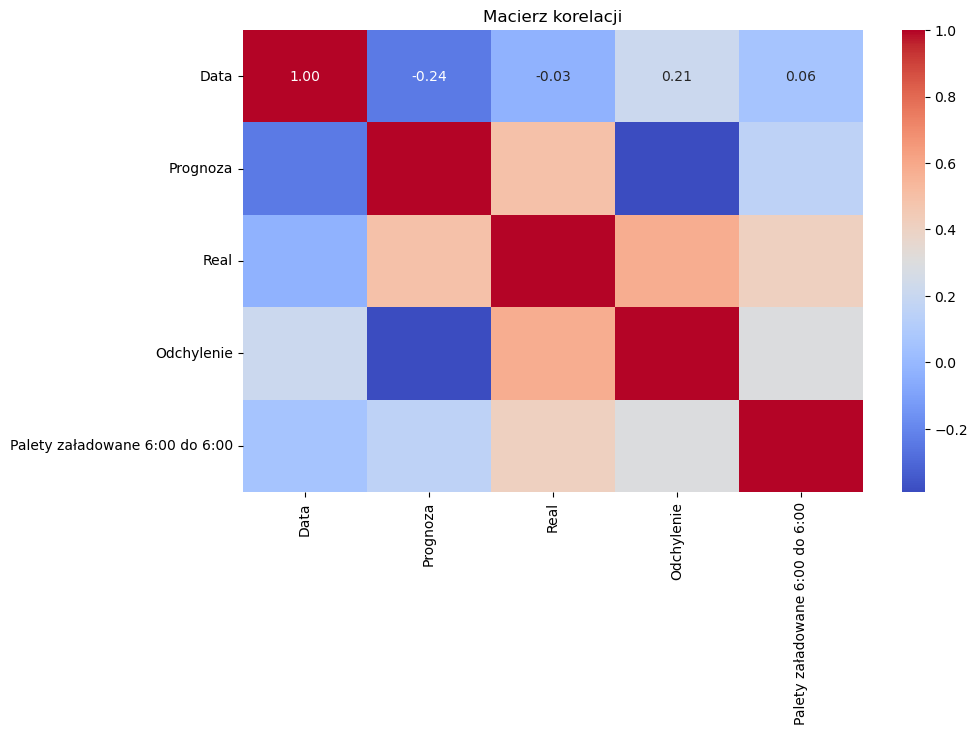

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sprawdzenie korelacji pomiędzy zmiennymi
corr_matrix = df.corr()

# Wizualizacja macierzy korelacji
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Macierz korelacji")
plt.show()

In [4]:
# Upewnijmy się, że kolumna 'Data' jest w formacie datetime
df['Data'] = pd.to_datetime(df['Data'])

In [5]:
# Ekstrakcja cech z daty
df['Dzien_tygodnia'] = df['Data'].dt.dayofweek  # 0 - Poniedziałek, 6 - Niedziela
df['Miesiac'] = df['Data'].dt.month  # 1 - Styczeń, 12 - Grudzień
df['Czy_weekend'] = df['Dzien_tygodnia'].apply(lambda x: 1 if x >= 5 else 0)  # 1 dla weekendu, 0 dla dni roboczych

In [6]:
df.head()

,Data,Prognoza,Real,Odchylenie,Palety załadowane 6:00 do 6:00,Dzien_tygodnia,Miesiac,Czy_weekend
0,2023-04-01,58828,47110,-0.199191,827,5,4,1
1,2023-04-02,57553,54049,-0.060883,468,6,4,1
2,2023-04-03,68346,53592,-0.215872,1319,0,4,0
3,2023-04-04,60256,46514,-0.228060,1209,1,4,0
4,2023-04-05,55852,61755,0.105690,1499,2,4,0


In [7]:
# Tworzenie średniej liczby kartonów z poprzednich 3 dni
df['Srednia_3dni'] = df['Real'].rolling(window=3).mean()

# Tworzenie trendu (różnica liczby kartonów w porównaniu do poprzedniego dnia)
df['Trend'] = df['Real'].diff()

# Tworzenie ruchomej średniej z 7 dni (średnia kartonów z tygodnia)
df['Srednia_7dni'] = df['Real'].rolling(window=7).mean()

# Wypełnienie brakujących wartości (po ruchomych średnich i różnicach)
df.fillna(0, inplace=True)

In [8]:
df.head()

,Data,Prognoza,Real,Odchylenie,Palety załadowane 6:00 do 6:00,Dzien_tygodnia,Miesiac,Czy_weekend,Srednia_3dni,Trend,Srednia_7dni
0,2023-04-01,58828,47110,-0.199191,827,5,4,1,0.000000,0.0,0.0
1,2023-04-02,57553,54049,-0.060883,468,6,4,1,0.000000,6939.0,0.0
2,2023-04-03,68346,53592,-0.215872,1319,0,4,0,51583.666667,-457.0,0.0
3,2023-04-04,60256,46514,-0.228060,1209,1,4,0,51385.000000,-7078.0,0.0
4,2023-04-05,55852,61755,0.105690,1499,2,4,0,53953.666667,15241.0,0.0


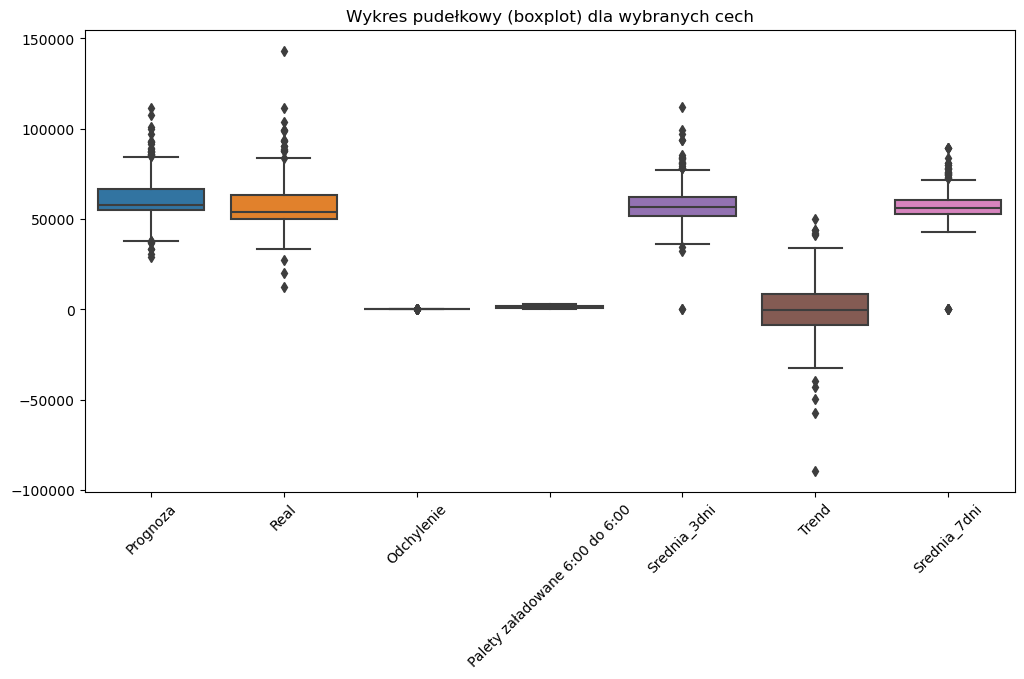

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Tworzymy boxplot dla każdej z kolumn zawierających wartości numeryczne
numerical_columns = ['Prognoza', 'Real', 'Odchylenie', 'Palety załadowane 6:00 do 6:00', 'Srednia_3dni', 'Trend', 'Srednia_7dni']

plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numerical_columns])
plt.xticks(rotation=45)
plt.title("Wykres pudełkowy (boxplot) dla wybranych cech")
plt.show()

In [10]:
# Oblicz IQR dla wybranych kolumn
Q1 = df[numerical_columns].quantile(0.25)
Q3 = df[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

# Zidentyfikuj wartości odstające
outliers = ((df[numerical_columns] < (Q1 - 1.5 * IQR)) | (df[numerical_columns] > (Q3 + 1.5 * IQR)))

# Wyświetl wiersze, które mają wartości odstające
df_outliers = df[outliers.any(axis=1)]
print("Wiersze z wartościami odstającymi (na podstawie IQR):")
df_outliers

Wiersze z wartościami odstającymi (na podstawie IQR):


,Data,Prognoza,Real,Odchylenie,Palety załadowane 6:00 do 6:00,Dzien_tygodnia,Miesiac,Czy_weekend,Srednia_3dni,Trend,Srednia_7dni
0,2023-04-01,58828,47110,-0.199191,827,5,4,1,0.000000,0.0,0.000000
1,2023-04-02,57553,54049,-0.060883,468,6,4,1,0.000000,6939.0,0.000000
2,2023-04-03,68346,53592,-0.215872,1319,0,4,0,51583.666667,-457.0,0.000000
3,2023-04-04,60256,46514,-0.228060,1209,1,4,0,51385.000000,-7078.0,0.000000
4,2023-04-05,55852,61755,0.105690,1499,2,4,0,53953.666667,15241.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
521,2024-09-05,46599,67526,0.449087,1854,3,9,0,63936.666667,4614.0,61953.285714
526,2024-09-10,33205,45594,0.373106,1345,1,9,0,51795.000000,-10148.0,56353.428571
527,2024-09-11,28778,40466,0.406144,1504,2,9,0,47267.333333,-5128.0,53146.857143
528,2024-09-12,33205,50147,0.510224,1549,3,9,0,45402.333333,9681.0,50664.142857


In [11]:
# Usuń wiersze z wartościami odstającymi z df
df_clean = df.drop(df_outliers.index)

# Zaktualizuj oryginalną ramkę danych
df = df_clean

df.head()

,Data,Prognoza,Real,Odchylenie,Palety załadowane 6:00 do 6:00,Dzien_tygodnia,Miesiac,Czy_weekend,Srednia_3dni,Trend,Srednia_7dni
6,2023-04-07,72716,62084,-0.146213,1808,4,4,0,68627.666667,-19960.0,58164.000000
7,2023-04-08,71357,46428,-0.349356,347,5,4,1,63518.666667,-15656.0,58066.571429
8,2023-04-09,57553,54049,-0.060883,1432,6,4,1,54187.000000,7621.0,58066.571429
9,2023-04-10,57553,54049,-0.060883,1432,0,4,0,51508.666667,0.0,58131.857143
11,2023-04-13,62750,55173,-0.120749,1302,3,4,0,49767.333333,15093.0,56272.428571


In [12]:
df.head(8)

,Data,Prognoza,Real,Odchylenie,Palety załadowane 6:00 do 6:00,Dzien_tygodnia,Miesiac,Czy_weekend,Srednia_3dni,Trend,Srednia_7dni
6,2023-04-07,72716,62084,-0.146213,1808,4,4,0,68627.666667,-19960.0,58164.000000
7,2023-04-08,71357,46428,-0.349356,347,5,4,1,63518.666667,-15656.0,58066.571429
8,2023-04-09,57553,54049,-0.060883,1432,6,4,1,54187.000000,7621.0,58066.571429
9,2023-04-10,57553,54049,-0.060883,1432,0,4,0,51508.666667,0.0,58131.857143
11,2023-04-13,62750,55173,-0.120749,1302,3,4,0,49767.333333,15093.0,56272.428571
12,2023-04-14,78281,69940,-0.106552,1752,4,4,0,55064.333333,14767.0,54543.285714
13,2023-04-15,80203,53270,-0.335810,892,5,4,1,59461.000000,-16670.0,53284.142857
14,2023-04-16,57553,54049,-0.060883,602,6,4,1,59086.333333,779.0,54372.857143


In [13]:
# Usuń duplikaty z ramki danych
df = df.drop_duplicates()
df

,Data,Prognoza,Real,Odchylenie,Palety załadowane 6:00 do 6:00,Dzien_tygodnia,Miesiac,Czy_weekend,Srednia_3dni,Trend,Srednia_7dni
6,2023-04-07,72716,62084,-0.146213,1808,4,4,0,68627.666667,-19960.0,58164.000000
7,2023-04-08,71357,46428,-0.349356,347,5,4,1,63518.666667,-15656.0,58066.571429
8,2023-04-09,57553,54049,-0.060883,1432,6,4,1,54187.000000,7621.0,58066.571429
9,2023-04-10,57553,54049,-0.060883,1432,0,4,0,51508.666667,0.0,58131.857143
11,2023-04-13,62750,55173,-0.120749,1302,3,4,0,49767.333333,15093.0,56272.428571
...,...,...,...,...,...,...,...,...,...,...,...
522,2024-09-06,62132,62572,0.007082,2303,4,9,0,64336.666667,-4954.0,62870.714286
523,2024-09-07,55919,46079,-0.175969,733,5,9,1,58725.666667,-16493.0,59587.285714
524,2024-09-08,57553,54049,-0.060883,778,6,9,1,54233.333333,7970.0,59587.285714
525,2024-09-09,42060,55742,0.325297,1304,0,9,0,51956.666667,1693.0,58607.428571


In [14]:
df.head(30)

,Data,Prognoza,Real,Odchylenie,Palety załadowane 6:00 do 6:00,Dzien_tygodnia,Miesiac,Czy_weekend,Srednia_3dni,Trend,Srednia_7dni
6,2023-04-07,72716,62084,-0.146213,1808,4,4,0,68627.666667,-19960.0,58164.000000
7,2023-04-08,71357,46428,-0.349356,347,5,4,1,63518.666667,-15656.0,58066.571429
8,2023-04-09,57553,54049,-0.060883,1432,6,4,1,54187.000000,7621.0,58066.571429
9,2023-04-10,57553,54049,-0.060883,1432,0,4,0,51508.666667,0.0,58131.857143
11,2023-04-13,62750,55173,-0.120749,1302,3,4,0,49767.333333,15093.0,56272.428571
12,2023-04-14,78281,69940,-0.106552,1752,4,4,0,55064.333333,14767.0,54543.285714
13,2023-04-15,80203,53270,-0.335810,892,5,4,1,59461.000000,-16670.0,53284.142857
14,2023-04-16,57553,54049,-0.060883,602,6,4,1,59086.333333,779.0,54372.857143
16,2023-04-18,65935,42586,-0.354121,1376,1,4,0,45516.000000,2673.0,50715.857143
17,2023-04-19,58006,41097,-0.291504,1324,2,4,0,41198.666667,-1489.0,50861.142857


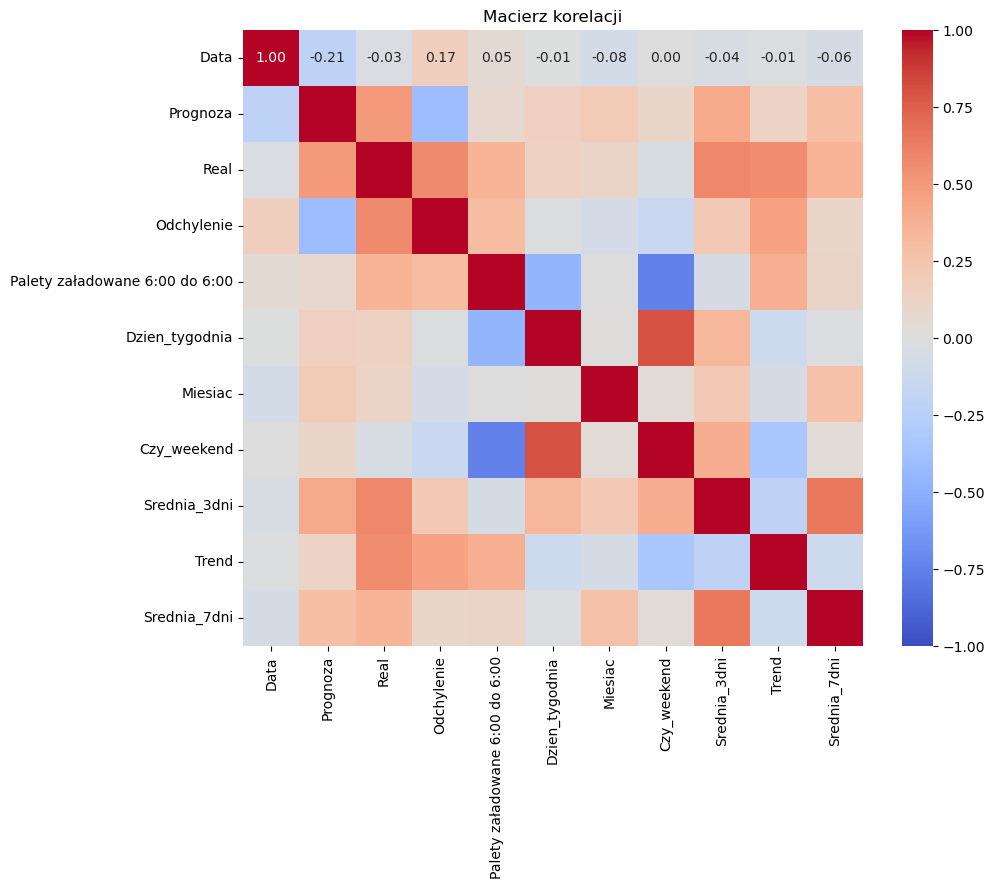

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.corr()

# Rysowanie ciepłej mapy macierzy korelacji
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Macierz korelacji')
plt.show()

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
import joblib

# Zakładam, że masz już ramkę danych df
# Przekształcenie kolumny 'Data' na numeryczną
df['Data'] = pd.to_datetime(df['Data'])
df['Dzien'] = df['Data'].dt.day
df['Miesiac'] = df['Data'].dt.month
df['Rok'] = df['Data'].dt.year

# Wybór cech i etykiety
X = df.drop(columns=['Data', 'Real', 'Odchylenie'])  # usuwamy 'Real' i 'Odchylenie'
y = df['Real']

# Wybrane cechy do standaryzacji
features_to_scale = ['Prognoza', 'Palety załadowane 6:00 do 6:00', 'Srednia_3dni', 'Trend', 'Srednia_7dni']

# Inicjalizacja scalera
scaler = StandardScaler()

# Skalowanie cech
X[features_to_scale] = scaler.fit_transform(X[features_to_scale])

# Podział na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ustalenie modelu
model = RandomForestRegressor()

# Definicja hiperparametrów do wyszukiwania
param_grid = [
    {
        'n_estimators': [100, 300, 500],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 10],
        'min_samples_leaf': [1, 4],
        'bootstrap': [True],                  # Oob_score=True tylko gdy bootstrap=True
        'oob_score': [True, False],           # Testowanie opcji oob_score przy bootstrap=True
        'random_state': [42]
    },
    {
        'n_estimators': [100, 300, 500],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 10],
        'min_samples_leaf': [1, 4],
        'bootstrap': [False],                 # Gdy bootstrap=False, oob_score nie jest możliwe
        'oob_score': [False],                 # Zawsze False, bo nie można używać out-of-bag bez bootstrap
        'random_state': [42]
    }
]

# Wyszukiwanie najlepszych hiperparametrów
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error')
grid_search.fit(X_train, y_train)

# Najlepszy model
best_model = grid_search.best_estimator_

# Prognozy na zbiorze testowym
y_pred = best_model.predict(X_test)

# Obliczenie metryk
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Wyświetlenie wyników
print(f'Najlepsze hiperparametry: {grid_search.best_params_}')
print(f'Mean Absolute Error: {mae}')
print(f'R² Score: {r2}')

# Zapis modelu oraz scalera
model_path = r"C:\Users\damia\Desktop\Przewidywanie_global\best_model.pkl"
scaler_path = r"C:\Users\damia\Desktop\Przewidywanie_global\scaler.pkl"

# Zapisz model
joblib.dump(best_model, model_path)

# Zapisz scaler
joblib.dump(scaler, scaler_path)

print(f"Model zapisany w: {model_path}")
print(f"Scaler zapisany w: {scaler_path}")

Najlepsze hiperparametry: {'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500, 'oob_score': True, 'random_state': 42}
Mean Absolute Error: 2626.749133333333
R² Score: 0.845987941085749
Model zapisany w: C:\Users\damia\Desktop\Przewidywanie_global\best_model.pkl
Scaler zapisany w: C:\Users\damia\Desktop\Przewidywanie_global\scaler.pkl
